In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

2024-05-15 19:50:07.532499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the dataset
df = pd.read_csv('~/Downloads/MPS DS Course Materials/DATA 606/sectoralstockanalysis/Dataset/Merged Data/Modified/Automobile_mod.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [3]:
# Function for calculating the metrics of a model trained on a particular stock in the sector.
def stockMetrics(y_test, predictions):
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100
    
    return mse, rmse, mae, nrmse, actual_growth, predicted_growth

In [4]:
# Function for plotting the Actual vs Predicted Growth of each stock in a sector.
def stockActVsPred(stock_df, y_test, predictions):
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()

2024-05-15 19:50:08.691652: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-05-15 19:50:08.938406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:08.939158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:08.9

Epoch 1/10


2024-05-15 19:50:09.036356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:09.037052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:09.037803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/30 [============================>.] - ETA: 0s - loss: 0.0659

2024-05-15 19:50:13.344783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:13.345824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:13.346726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 5s 68ms/step - loss: 0.0654 - val_loss: 0.0022
Epoch 2/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0112 - val_loss: 0.0077
Epoch 3/10
30/30 [==============================] - 1s 44ms/step - loss: 0.0083 - val_loss: 0.0028
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0077 - val_loss: 0.0025
Epoch 5/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0074 - val_loss: 0.0021
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 8/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0058 - val_loss: 0.0025
Epoch 9/10
30/30 [==============================] - 1s 46ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 10/10
30/30 [==============================] - 1s 47ms/step - loss: 0.0056 - val_loss: 0.0016


2024-05-15 19:50:24.970842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:24.971721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:24.972302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 17ms/step
Metrics of EICHERMOT:
MSE: 19447934.418689825, RMSE: 4409.981226568864, NRMSE: 0.21954404473385097, MAE: 2861.164422123016, Actual Growth: -88.53540981527283, Predicted Growth: -74.29000735282898


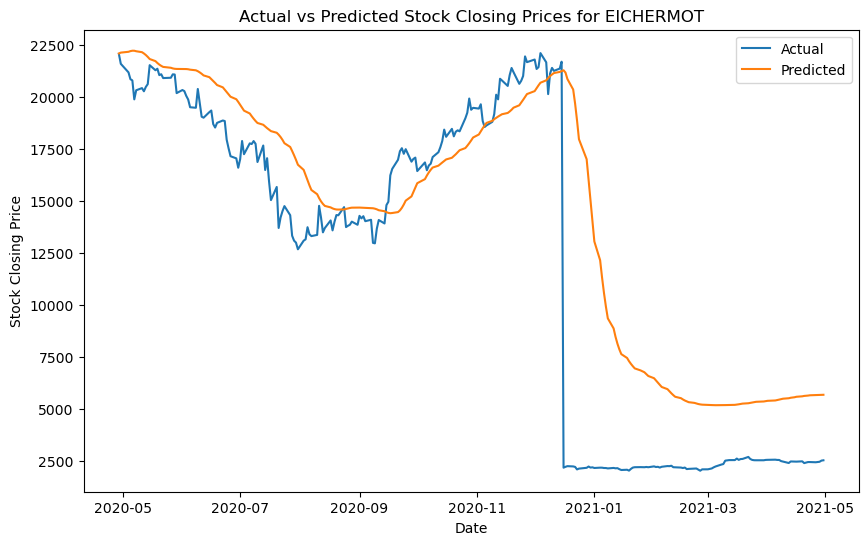

2024-05-15 19:50:25.863906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:25.864697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:25.865196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-05-15 19:50:26.185291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:26.186036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:26.186499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/30 [============================>.] - ETA: 0s - loss: 0.0579

2024-05-15 19:50:30.276764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:30.278019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:30.278946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 5s 75ms/step - loss: 0.0575 - val_loss: 0.0078
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0126 - val_loss: 0.0050
Epoch 3/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0073 - val_loss: 0.0025
Epoch 4/10
30/30 [==============================] - 2s 55ms/step - loss: 0.0078 - val_loss: 0.0035
Epoch 5/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0064 - val_loss: 0.0044
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0068 - val_loss: 0.0027
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 8/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 9/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 10/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0058 - val_loss: 0.0035


2024-05-15 19:50:41.481679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:41.482717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:41.483574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 11ms/step
Metrics of HEROMOTOCO:
MSE: 27005.161377225348, RMSE: 164.3324720717891, NRMSE: 0.09165479911419122, MAE: 129.73638305664065, Actual Growth: 27.849376169040706, Predicted Growth: 22.278745472431183


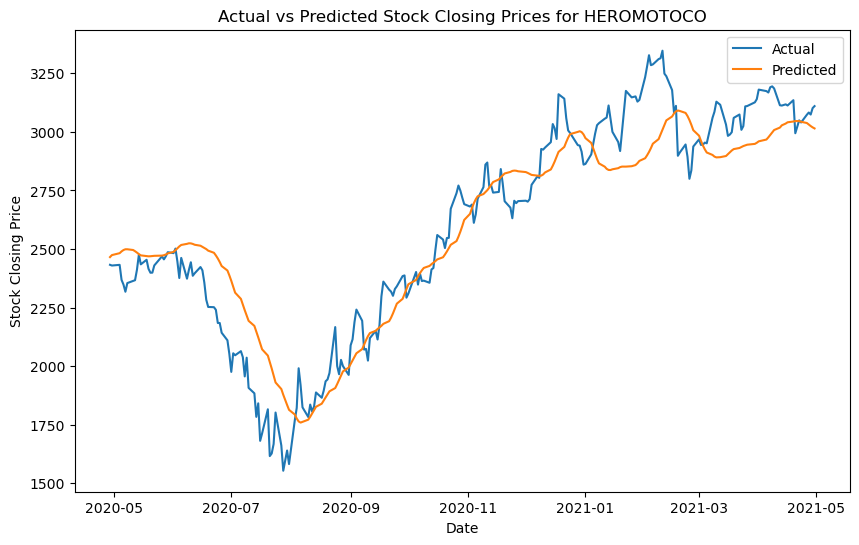

Epoch 1/10


2024-05-15 19:50:42.434745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:42.435282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:42.435928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - ETA: 0s - loss: 0.0599

2024-05-15 19:50:46.742034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:46.742859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:46.743669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 5s 68ms/step - loss: 0.0599 - val_loss: 0.0029
Epoch 2/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0121 - val_loss: 0.0097
Epoch 3/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0116 - val_loss: 0.0031
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0088 - val_loss: 0.0021
Epoch 5/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0089 - val_loss: 0.0050
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0082 - val_loss: 0.0026
Epoch 7/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0077 - val_loss: 0.0029
Epoch 8/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0077 - val_loss: 0.0023
Epoch 9/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0083 - val_loss: 0.0014
Epoch 10/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0071 - val_loss: 0.0022


2024-05-15 19:50:58.038433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:58.039400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:58.040219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/8 [==>...........................] - ETA: 3s

2024-05-15 19:50:58.270998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:58.272068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:58.272831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 15ms/step
Metrics of M&M:
MSE: 3592.441790821124, RMSE: 59.936981829427516, NRMSE: 0.12332712310581793, MAE: 48.15135066925532, Actual Growth: 34.289973909802455, Predicted Growth: 38.85353207588196


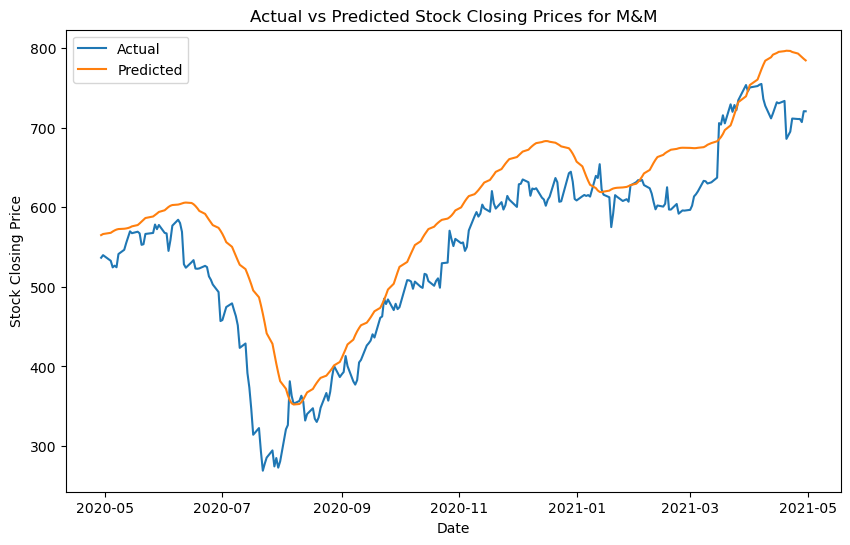

Epoch 1/10


2024-05-15 19:50:58.862056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:50:58.862723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:50:58.863390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - ETA: 0s - loss: 0.0455

2024-05-15 19:51:03.100982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:03.101831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:03.102521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 5s 68ms/step - loss: 0.0455 - val_loss: 0.0044
Epoch 2/10
30/30 [==============================] - 1s 43ms/step - loss: 0.0075 - val_loss: 0.0030
Epoch 3/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0058 - val_loss: 0.0030
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 7/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 8/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 9/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 10/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0042 - val_loss: 0.0023


2024-05-15 19:51:14.502680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:14.503998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:14.504879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 13ms/step
Metrics of MARUTI:
MSE: 230429.6641189369, RMSE: 480.0308991293549, NRMSE: 0.12660211230713675, MAE: 389.1124294704861, Actual Growth: 4.621360285569711, Predicted Growth: -1.5065483748912811


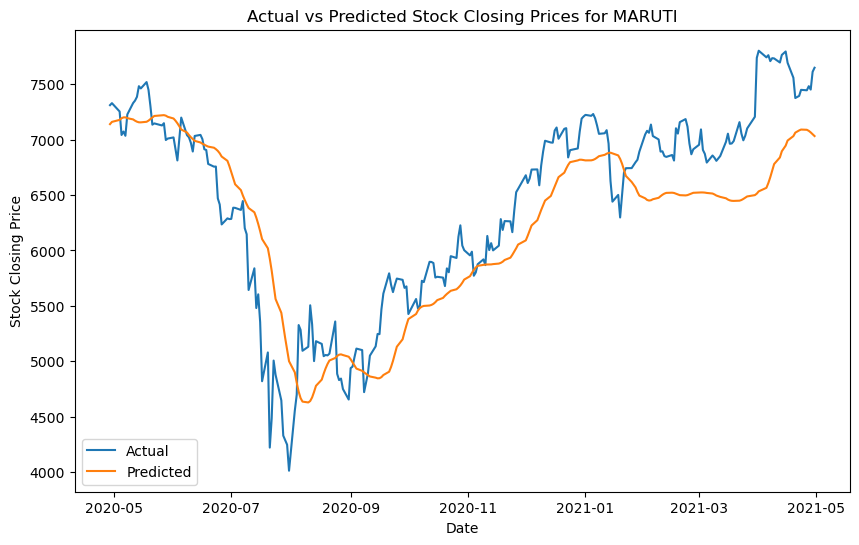

Epoch 1/10


2024-05-15 19:51:15.464316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:15.465004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:15.465620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/30 [============================>.] - ETA: 0s - loss: 0.0163

2024-05-15 19:51:19.894229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:19.895201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:19.896053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 5s 72ms/step - loss: 0.0162 - val_loss: 0.0184
Epoch 2/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0059 - val_loss: 0.0053
Epoch 3/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 4/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 5/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0033 - val_loss: 0.0054
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 8/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 9/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0032 - val_loss: 0.0028


2024-05-15 19:51:30.483665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:30.484668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:30.485399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 16ms/step
Metrics of BAJAJ-AUTO:
MSE: 39779.99267522016, RMSE: 199.44922330061894, NRMSE: 0.13185853715497742, MAE: 163.5371244884673, Actual Growth: 9.331449795244605, Predicted Growth: -1.6658104956150055


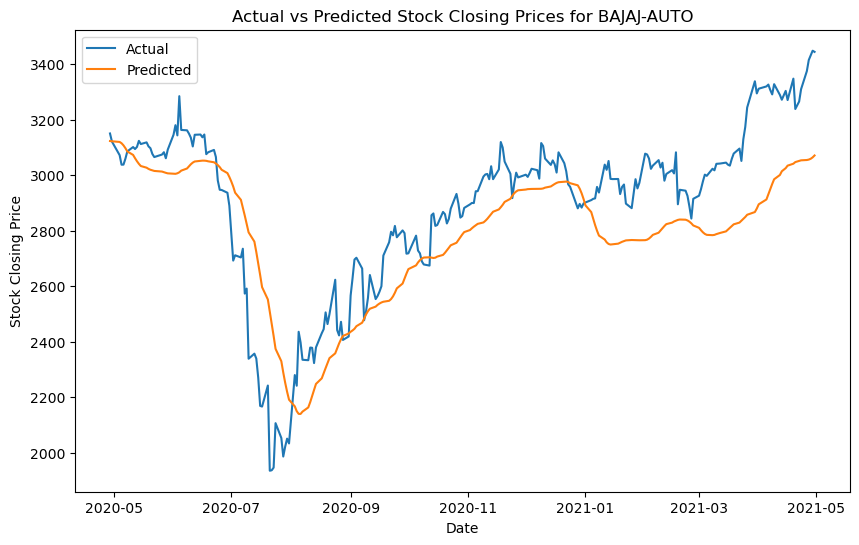

Epoch 1/10


2024-05-15 19:51:31.351473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:31.352267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:31.352763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - ETA: 0s - loss: 0.0563

2024-05-15 19:51:35.191391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:35.192139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:35.193198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 4s 69ms/step - loss: 0.0563 - val_loss: 0.0013
Epoch 2/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0089 - val_loss: 9.8830e-04
Epoch 3/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0078 - val_loss: 0.0014
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0066 - val_loss: 0.0016
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0062 - val_loss: 0.0014
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0062 - val_loss: 8.2233e-04
Epoch 8/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 9/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0055 - val_loss: 8.4256e-04
Epoch 10/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0059 - val_loss: 0.0014


2024-05-15 19:51:45.988579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-15 19:51:45.989650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-15 19:51:45.990352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 15ms/step
Metrics of TATAMOTORS:
MSE: 514.4472646077987, RMSE: 22.681429950684297, NRMSE: 0.1679483891202095, MAE: 18.43830129835341, Actual Growth: -0.3252914068853163, Predicted Growth: 2.4045947939157486


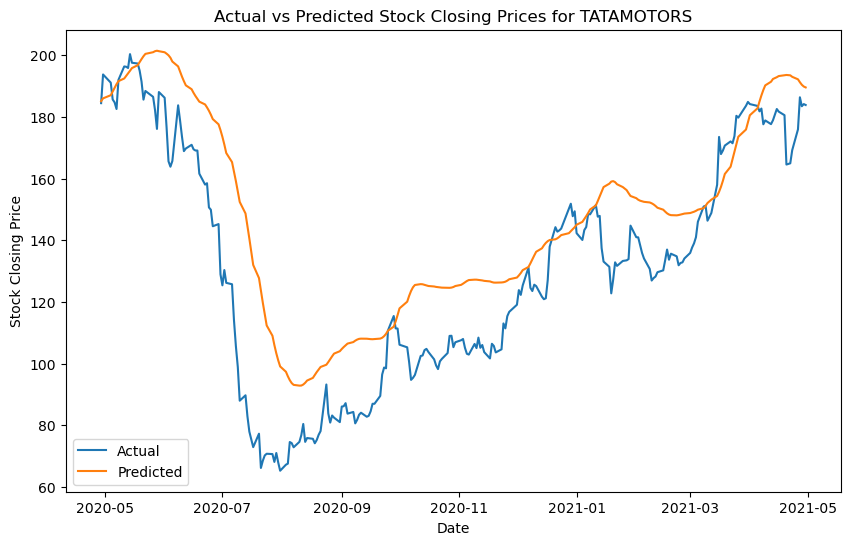

"for symbol, metrics in stock_metrics.items():\n    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')"

In [5]:
# Calculate rolling mean and standard deviation for the 'Close' column
df['50_day_mean'] = df['Close'].rolling(window=50).mean()
df['200_day_mean'] = df['Close'].rolling(window=200).mean()
df['50_day_std'] = df['Close'].rolling(window=50).std()
df['200_day_std'] = df['Close'].rolling(window=200).std()

# Drop rows with NaN values resulting from rolling calculations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Close', '50_day_mean', '200_day_mean', '50_day_std', '200_day_std']
target = 'Close'

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Dictionary to store metrics for each stock
stock_metrics = {}

# Process each stock
for symbol in df['Symbol'].unique():
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Scale features
    scaled_features = scaler.fit_transform(stock_df[features])
    scaled_target = scaler.fit_transform(stock_df[[target]])
    
    X, y = [], []
    dates = []  # List to store the corresponding dates for X and y
    time_steps = 30
    for i in range(time_steps, len(stock_df)):
        X.append(scaled_features[i-time_steps:i])
        y.append(scaled_target[i])
        dates.append(stock_df['Date'].iloc[i])  # Store the corresponding date
        
    X=np.array(X)
    y=np.array(y)
    
    # Convert dates list to a NumPy array for easier indexing
    dates = np.array(dates)
    
    '''# Create sequences
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i:(i + time_steps)])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)

    time_steps = 30
    X, y = create_dataset(scaled_features, scaled_target, time_steps)'''
    
    # Split into training and testing datasets based on the specified dates
    '''train_mask = stock_df['Date'] < pd.Timestamp('2020-01-01')
    test_mask = (stock_df['Date'] >= pd.Timestamp('2020-01-01')) & (stock_df['Date'] < pd.Timestamp('2021-01-01'))
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]'''
    
    # Now create masks based on the adjusted dates array
    train_mask = dates < pd.Timestamp('2020-01-01')
    test_mask = (dates >= pd.Timestamp('2020-01-01')) & (dates < pd.Timestamp('2021-01-01'))
    
    # Use these masks to split the data
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    
    # Build the LSTM model
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    '''# Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100'''
    
    mse, rmse, mae, nrmse, actual_growth, predicted_growth = stockMetrics(y_test, predictions)
    
    # Store metrics
    stock_metrics[symbol] = {
        'MSE': mse,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'Actual Growth %': actual_growth,
        'Predicted Growth %': predicted_growth
    }
    
    print(f'Metrics of {symbol}:')
    print(f'MSE: {mse}, RMSE: {rmse}, NRMSE: {nrmse}, MAE: {mae}, Actual Growth: {actual_growth}, Predicted Growth: {predicted_growth}')
    
    stockActVsPred(stock_df, y_test, predictions)

    '''# Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()'''

# Output metrics for each stock
'''for symbol, metrics in stock_metrics.items():
    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')'''


In [6]:
# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(stock_metrics).T

# Display the DataFrame
print(metrics_df)

# Calculate average metrics
average_metrics = {
    'MSE': np.mean(metrics_df['MSE']),
    'RMSE': np.mean(metrics_df['RMSE']),
    'NRMSE': np.mean(metrics_df['NRMSE']),
    'MAE': np.mean(metrics_df['MAE']),
    'Actual Growth %': np.mean(metrics_df['Actual Growth %']),
    'Predicted Growth %': np.mean(metrics_df['Predicted Growth %'])
}

print("Average Metrics for All Stocks:")
print(average_metrics)

                     MSE         RMSE     NRMSE          MAE  Actual Growth %  \
EICHERMOT   1.944793e+07  4409.981227  0.219544  2861.164422       -88.535410   
HEROMOTOCO  2.700516e+04   164.332472  0.091655   129.736383        27.849376   
M&M         3.592442e+03    59.936982  0.123327    48.151351        34.289974   
MARUTI      2.304297e+05   480.030899  0.126602   389.112429         4.621360   
BAJAJ-AUTO  3.977999e+04   199.449223  0.131859   163.537124         9.331450   
TATAMOTORS  5.144473e+02    22.681430  0.167948    18.438301        -0.325291   

            Predicted Growth %  
EICHERMOT           -74.290007  
HEROMOTOCO           22.278745  
M&M                  38.853532  
MARUTI               -1.506548  
BAJAJ-AUTO           -1.665810  
TATAMOTORS            2.404595  
Average Metrics for All Stocks:
{'MSE': 3291542.6876527728, 'RMSE': 889.4020388084564, 'NRMSE': 0.14348916758936398, 'MAE': 601.6900018510364, 'Actual Growth %': -2.1280901770834437, 'Predicted Growth 